<h1>Segmentation Example</h1>

In [1]:
# Load segmenting functions
include("C:\\Users\\cmeri\\OneDrive - Dartmouth College\\Math_76\\FinalProject\\Math76_FinalProject\\Julia_Segment.jl")

segment_mask (generic function with 1 method)

<h3>Raster Conversion and Image Creation</h3>

This section demonstates how to create .jpg images from the raw .tiff raster files. Images can be created by combining any three bands from the raster or by creating a normalized difference index using two bands. For these rasters, the Red, Blue, Green, Near-Infrared, and Shortwave Infrared are included. Below we create a vizuale image using the Red, Green, and Blue bands.

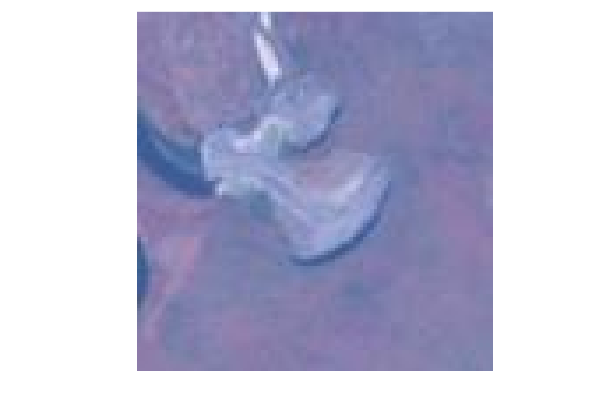

In [2]:
# Select .tif file to display
selected_date = "C:\\Users\\cmeri\\OneDrive - Dartmouth College\\Math_76\\FinalProject\\Math76_FinalProject\\Data\\Sentinel-s002\\Sentinel2_2020_14.tif"

# Select Red, Green, and Blue bands from the raster and save as a .jpg image
path = select_bands(selected_date, 1, 2, 3, "RGB.jpg") # 1-Red, 2-Green, 3-Blue image bands

# Load the newly create .jpg image
RGB_image = load(path)

# Plot the image
plot(RGB_image, framestyle=:none)

<h3>Basic Segmenting</h3>
The `count_pixels` function uses seeded segmentation to segment an individual image. Plotting the result for the image above shows that the RGB image is fairly nicely segmented using this algorithm. Later, we use masks to apply the segmentation to many images.

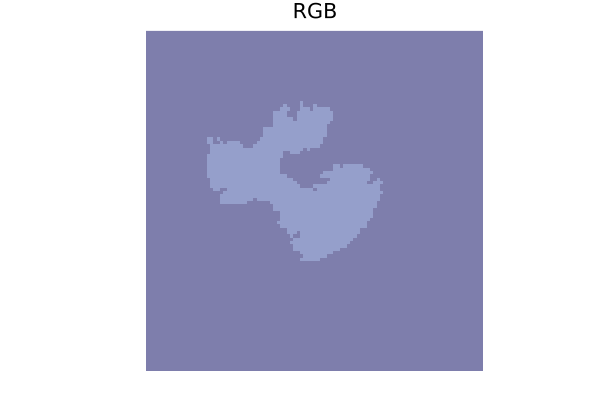

The segemented region contains 1194 pixels.


1194

In [3]:
# Segement the RGB image
count_pixels(path, (58,51), (90,90), Display=true) # Uses two seeds

<h3>Segmenting Time Series</h3>
We can now segment many images for a given hillslope failure over time. The `segment_mask` function first creates a water mask to limit the number of water pixels classified as part of the failure. It then segments each sucessive image, starting with the most recent image. Since the failure should not be larger at earlier times, the function uses a vegetation mask if a poor segmentation results in a larger failure at earlier times. If this happens, the previous image is thresholded to get pixels with low vegetation cover. Then, in the current image, only pixels that also have low vegetation cover within that mask are selected. This ensures that the slump can growth only in the forwards time direction.

The segemented region contains 2112 pixels.
The segemented region contains 1696 pixels.
The segemented region contains 4452 pixels.
The segemented region contains 1592 pixels.
The segemented region contains 1643 pixels.
The segemented region contains 1589 pixels.
The segemented region contains 1834 pixels.
The segemented region contains 1449 pixels.
The segemented region contains 1608 pixels.
The segemented region contains 1729 pixels.
The segemented region contains 1744 pixels.
The segemented region contains 1467 pixels.
The segemented region contains 1467 pixels.
The segemented region contains 1443 pixels.
The segemented region contains 1130 pixels.
The segemented region contains 1153 pixels.
The segemented region contains 1178 pixels.
The segemented region contains 1036 pixels.
The segemented region contains 2761 pixels.
The segemented region contains 1351 pixels.
The segemented region contains 1396 pixels.
The segemented region contains 1385 pixels.
The segemented region contains 1

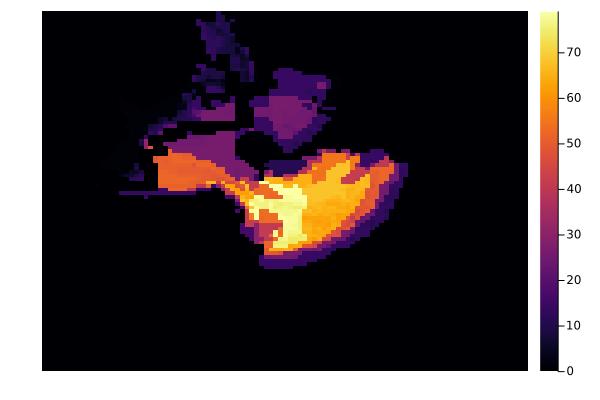

79×3 DataFrame
 Row │ Year   Week   Pixels 
     │ Int64  Int64  Int64  
─────┼──────────────────────
   1 │  2016      1     244
   2 │  2016      6     244
   3 │  2016     10     244
   4 │  2017      1     242
   5 │  2017      2     244
   6 │  2017      5     244
   7 │  2017      6     244
   8 │  2017      7     244
   9 │  2017      8     244
  10 │  2017      9     244
  11 │  2017     10     244
  ⋮  │   ⋮      ⋮      ⋮
  70 │  2023      9    1463
  71 │  2023     10    1452
  72 │  2023     16    1239
  73 │  2024      1    1362
  74 │  2024      2    1346
  75 │  2024      3    1366
  76 │  2024      4    1402
  77 │  2024      6    1041
  78 │  2024      8    1696
  79 │  2024     10    2112
             58 rows omitted

In [4]:
data_path = "C:/Users/cmeri/OneDrive - Dartmouth College/Math_76/FinalProject/Math76_FinalProject/Data/Sentinel-s002"
result = segment_mask(data_path,(58,51),(90,90),Seed3=(5,5),Display=true,ndvi_threshold=0.5,ndwi_threshold=0.65,ndwi_image="Sentinel2_2016_1.tif")

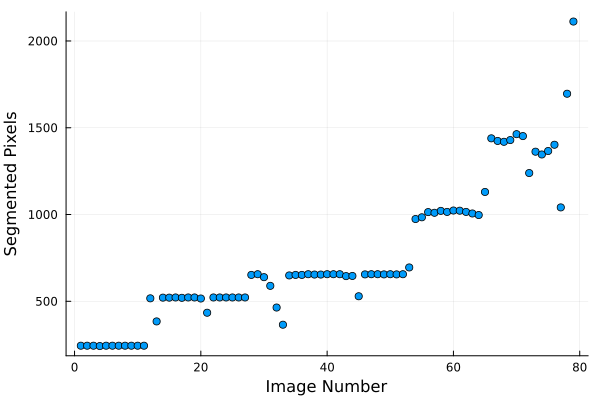

In [5]:
plot(result[!,:Pixels], xlabel="Image Number", ylabel="Segmented Pixels", label=nothing, seriestype=:scatter)